In [1]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Feature Extraction from Dataset

In [2]:
news = load_files('./mini_newsgroups/')
classes=news.target_names
print(classes)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## Splitting into train and test set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size =0.3, random_state = 0 )


## Importing NLTK libraries


In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

## Initializing Objects

In [5]:
# init Objects
tokenizer=RegexpTokenizer(r'\w+')
en_stopwords=set(stopwords.words('english'))
ps=PorterStemmer()

## Tokenizing, Stemming and Removing Stopwords

In [6]:
def getStemmedReview(data):
    data=data.decode('windows-1252')
    data=data.lower()
    
    #Tokenize
    tokens=tokenizer.tokenize(data)
    new_tokens=[token for token in tokens if token not in en_stopwords]
    stemmed_tokens=[ps.stem(token) for token in new_tokens]
    clean_data=' '.join(stemmed_tokens)
    return clean_data

## Cleaning Training Data

In [7]:
X_train_clean=[getStemmedReview(i) for i in X_train]

## Vectorizing Training data

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() 
cv.fit(X_train_clean)
X_train_vec=cv.transform(X_train_clean).toarray()
print(X_train_vec)
print(X_train_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]
(1400, 33747)


## Applying Multinomial Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Cleaning Test Data

In [10]:
X_test_clean=[getStemmedReview(i) for i in X_test]

## Vectorizing Test Data

In [11]:
X_test_vec=cv.transform(X_test_clean).toarray()
print(X_test_vec)
print(X_test_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(600, 33747)


## Making Predictions on Test Data

In [12]:
y_test_pred=mnb.predict(X_test_vec)

## Checking score

In [13]:
print(mnb.score(X_test_vec,y_test))

0.7866666666666666


## Classification Report

In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        34
           1       0.44      0.71      0.54        34
           2       0.93      0.50      0.65        26
           3       0.75      0.64      0.69        33
           4       0.79      0.79      0.79        29
           5       0.76      0.69      0.72        32
           6       0.88      0.85      0.87        27
           7       1.00      0.88      0.94        33
           8       0.96      0.90      0.93        29
           9       0.93      0.96      0.94        26
          10       0.96      0.87      0.91        30
          11       0.94      0.85      0.89        34
          12       0.73      0.64      0.68        25
          13       0.85      0.92      0.88        25
          14       0.93      0.89      0.91        28
          15       0.83      1.00      0.91        29
          16       0.89      0.71      0.79        35
          17       0.86    

## Visualizing Confusion Matrix

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_labels=np.unique(news.target)


## Plotting confusion Matrix

Confusion matrix, without normalization
[[21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0 10]
 [ 0 24  1  2  1  3  0  0  0  0  0  0  2  1  0  0  0  0  0  0]
 [ 0  4 13  3  0  4  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  5  0 21  3  0  0  0  0  0  0  0  1  1  0  0  0  0  0  2]
 [ 0  5  0  0 23  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  8  0  0  0 22  0  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  2  1  0 23  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  2  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2 26  0  0  1  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0 29  0  0  0  0  2  0  0  1]
 [ 0  4  0  0  0  0  1  0  0  0  0  1 16  0  1  0  0  2  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  1 25  0  1  0  0  0]
 [ 0  0  0  0  

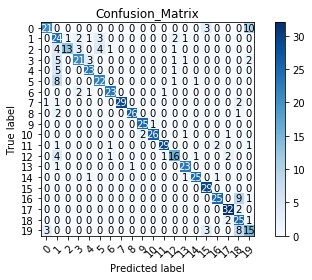

In [18]:
plot_confusion_matrix(y_test,y_test_pred,classes=class_labels,
                          normalize=False,
                          title="Confusion_Matrix",
                          cmap=plt.cm.Blues)
plt.show()

# Text Classification using scratch implementation of Multinomial Naive Bayes and without NLTK Libraries

In [19]:
# List of all stopwords to be removed from document
stopwords = {"a", "about", "above", "above", "across", "after", "afterwards", "again", "against", 
             "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", 
             "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", 
             "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", 
             "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", 
             "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", 
             "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", 
             "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", 
             "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", 
             "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from",
             "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her",
             "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how",
             "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself",
             "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile",
             "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself",
             "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", 
             "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", 
             "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", 
             "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious"
             , "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow",
             "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", 
             "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", 
             "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though",
             "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", 
             "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", 
             "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", 
             "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", 
             "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", 
             "yourself", "yourselves", "the"}


In [20]:
def preprocess(data):
    total_chars = []  # To save an array of words after processing
    for i in range(len(data)):
        words = data[i].decode("windows-1252") # decode the given sentence from bytes format to string format
        all_chars = words.split(' ')
        tokenize_word = []
        # To apply preprocess on a decoded sentence
        for x in range(len(all_chars)):
            word = ''
            # Removing all meta data present in document
            word = all_chars[x].replace('\n','')
            word = word.replace('\r','')
            word = word.replace('\t','')
            # Removing punctuation marks from document 
            word = word.replace(',','')
            word = word.replace('(','')
            word = word.replace(').','')
            word = word.replace(')','')
            word = word.replace('.','')
            word = word.replace('"','')    
            
            # Converting whole document to lower case
            word = word.lower()
            
            # If after the preprocessing any word is blank or has word length<3 or only digits remain in it
            if word=='' or word.isdigit() or len(word)<3:
                continue
            
            # If word is not a stop word then used to form array
            elif word not in stopwords:
                tokenize_word.append(word)
        
        total_chars.append(tokenize_word)
    
    return total_chars

In [21]:
# Used to convert the preprocessed 2D-list into a 1D-list so that frequency of words can be calculated

def flatten(data):
    new_data = []
    
    for sentence in data:
        for word in sentence:
            
            if word=='':
                continue
            else:
                new_data.append(word)
    
    return new_data

In [22]:
# To apply preprocessing and flattening on training data

doc_list = preprocess(X_train)
bag_of_words = flatten(doc_list)
len(bag_of_words)

212606

In [23]:
# Converting the list into a numpy array
np_bag_of_words = np.asarray(bag_of_words)

In [24]:
# To get frequency of each individual word, Bag of words with Term Frequency
word, freq  = np.unique(np_bag_of_words, return_counts=True)
len(freq)

70891

In [25]:
# To sort both arrays together based on frequency, zip function is used to map similar index of multiple containers
# so that it can be used as a single identity

mapped = list(zip(word, freq)) #Uses the zip function and converts the tupple into list
mapped = sorted(mapped, key=lambda wrd: wrd[1], reverse=True) #Sorts the list based on Term Frequency in descending order
word, freq = zip(*(mapped)) # Stores the unzipped list in 2 separate lists

## Choosing top 6000 words to make dictionary with words as features

In [26]:
# To extract top 6000 words with highest frequencies to be used as features
no_of_words = 6000
features = word[0:no_of_words]

In [27]:
# Function to form a dictionary with frequencies of all the words in the document
def form_dictionary(doc_list):
    dictionary = {}
    sentence_num = 1
    for each_sentence in doc_list:
        dictionary[sentence_num] = {}
        for each_word in each_sentence:
            dictionary[sentence_num][each_word] = dictionary[sentence_num].get(each_word, 0) + 1    
        sentence_num += 1
    return dictionary

In [28]:
# To form a 2D-array with the frequency of every word in our features list stored individually for every document
def matrix(dictionary):
    final_matrix = []
    for k in dictionary.keys():
        row = []
        for f in features:
            if(f in dictionary[k].keys()):
            #if word f is present in the dictionary of the document as a key, its value is copied
            #this gives us no. of occurences
                row.append(dictionary[k][f]) 
            else:
            #if not present, the no. of occurences is zero
                row.append(0)
        final_matrix.append(row)
    return final_matrix

In [29]:
# Forms dictionary for training data
dictionary = form_dictionary(doc_list)

# Forms 2d-list with frequencies of every feature in training data
X_train = matrix(dictionary)

In [30]:
# To convert the 2D-lists into numpy 2D-arrays
X_train = np.asarray(X_train)
Y_train = np.asarray(y_train)

## Applying preprocessing 

In [31]:
# To perform preprocessing on testing data
test_chars = preprocess(X_test)
len(test_chars)

600

In [32]:
# Dictionary with frequency of each word in testing data
dictionary_test = form_dictionary(test_chars)
# 2D-list with frequencies of every feature in testing data
X_test = matrix(dictionary_test)

# To convert to numpy arrays
X_test = np.asarray(X_test)
Y_test = np.asarray(y_test)

In [33]:
# FIT FUNCTION
def fit(X_train, Y_train):
    result = {}
    class_values = set(Y_train)
    
    for current_class in class_values:
        result[current_class] = {}
        result["total_data"] = len(Y_train)
        current_class_rows = (Y_train == current_class)
        X_train_current = X_train[current_class_rows]
        Y_train_current = Y_train[current_class_rows]
        result[current_class]["total_count"] = len(Y_train_current)
        num_features = X_train.shape[1]
        
        for j in range(num_features):
            result[current_class][features[j]] = {}
            result[current_class][features[j]] = X_train_current[:,j].sum()
            
    return result

In [34]:
# Finds invidual log probabilities of every word for a given class
def log_probablity(dictionary, x, current_class):
    output = np.log(dictionary[current_class]["total_count"]) - np.log(dictionary["total_data"])
    number_of_words = len(x)
    
    for j in range(number_of_words):
        if(x[j] in dictionary[current_class].keys()):
            xj = x[j]
            count_current_class_equal_xj = dictionary[current_class][xj] + 1
            count_current_class = dictionary[current_class]["total_count"] + len(dictionary[current_class].keys())
            current_xj_prob = np.log(count_current_class_equal_xj) - np.log(count_current_class)
            output = output + current_xj_prob
        else:
            continue
    
    return output

In [35]:
# To find the best class for the given document in testing data
def predictSinglePoint(dictionary, x):
    classes = dictionary.keys()
    best_p = -10000000
    best_class = -1
    for current_class in classes:
        if(current_class == "total_data"):
            continue
        p_current_class = log_probablity(dictionary, x, current_class)
        if(p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
            
    return best_class

In [36]:
def predict(dictionary, X_test):
    Y_predict = []
    for x in X_test:
        y_predicted = predictSinglePoint(dictionary, x)
        Y_predict.append(y_predicted)
    return Y_predict

In [37]:
dictionary_scratch = fit(X_train, Y_train)

In [38]:
X_test = []
for key in dictionary_test.keys():
    all_words = dictionary_test[key].keys()
    all_words = list(all_words)
    X_test.append(all_words)

In [39]:
predicted_values = np.asarray(predict(dictionary_scratch, X_test))

In [40]:
accuracy_score(Y_test, predicted_values)

0.5133333333333333

In [41]:
print(classification_report(Y_test, predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.53      0.65        34
           1       0.18      0.94      0.31        34
           2       1.00      0.12      0.21        26
           3       1.00      0.18      0.31        33
           4       0.86      0.21      0.33        29
           5       0.76      0.41      0.53        32
           6       1.00      0.41      0.58        27
           7       1.00      0.18      0.31        33
           8       0.92      0.38      0.54        29
           9       0.82      0.54      0.65        26
          10       0.95      0.63      0.76        30
          11       0.93      0.79      0.86        34
          12       1.00      0.08      0.15        25
          13       0.60      0.96      0.74        25
          14       0.82      0.50      0.62        28
          15       0.77      0.93      0.84        29
          16       0.73      0.31      0.44        35
          17       0.97    